# Лабораторная работа №3

##Задание

В рамках данной лабораторной работы предполагается построение многоклассового
классификатора с помощью полносвязной нейронной сети

Задание
1. Выберите предметную область
2. Спроектируйте полносвязную нейронную сеть с использованием Python и
TensorFlow
Примерные предметные области для самостоятельного выбора:
1. Классификация типов самолётов.
2. Классификация типов автомобилей.
3. Классификация типов компьютеров.
4. Классификация заболеваний человека.
5. Классификация растений.

##Импорт библиотек

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import random
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
from keras import utils

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
from google.colab import files
from google.colab import drive

In [ ]:
# подключение диска

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import listdir

In [ ]:
import PIL
from PIL import Image

In [ ]:
import natsort

In [ ]:
import pathlib
from pathlib import Path

In [ ]:
!pip install split-folders

import splitfolders

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import shutil

##Функции

In [ ]:
# Функция для визуализации процесса обучения

def history_visualization(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.legend()
  plt.show()

In [ ]:
# функция, которая выводит изображения на экран
# path - директория с изображениями, images_list - список названий,
# ind_from - индекс изображения, с которого нужно выводить на экран,
# ind_to - индекс изображения, до которого нужно отображать,
# cols - количество столбцов

def display_images(path, images_list, ind_from, ind_to, cols):

  # создаем график(фигуру) для вывода всех фото
  pic_box = plt.figure(figsize=(14,12))

  image_count = ind_to - ind_from
  rows = image_count // cols

  if (image_count % rows != 0):
    rows = rows + 1

  for i, image_name in enumerate(images_list[ind_from:ind_to]):

      # считываем текущее изображение
      image = plt.imread(str(Path(path, image_name)))

      # создаем "подграфик" для вывода текущего изображения в заданной позиции
      ax = pic_box.add_subplot(rows,cols,i+1)
      pic_box.tight_layout (h_pad = 1)

      # в качестве названия графика определяем имя фотографии и число каналов
      ax.set_title(str(image_name) + '\n Каналов = ' + str(image.shape[2]))

      # выводим изображение на экран
      plt.imshow(image)

      # отключаем вывод осей графика
      plt.axis('off')

  plt.show()

## Пример программы

Набор данных MNIST (сокращение от «Modified National Institute of Standards and
Technology») — объёмная база данных образцов рукописного написания цифр. База данных
является стандартом, предложенным Национальным институтом стандартов и технологий
США с целью калибрации и сопоставления методов распознавания изображений с
помощью машинного обучения в первую очередь на основе нейронных сетей. Данные
состоят из заранее подготовленных примеров изображений, на основе которых проводится
обучение и тестирование систем. База данных была создана после переработки
оригинального набора чёрно-белых образцов размером 20x20 пикселей NIST. Создатели
базы данных NIST, в свою очередь, использовали набор образцов из Бюро переписи
населения США, к которому были добавлены ещё тестовые образцы, написанные
студентами американских университетов. Образцы из набора NIST были нормализированы,
прошли сглаживание и приведены к серому полутоновому изображению размером 28x28
пикселей. Набор данных MNIST содержит 60000 изображений для обучения и 10000
изображений для тестирования. Половина образцов для обучения и тестирования были
взяты из набора NIST для обучения, а другая половина — из набора NIST для тестирования

### Считывание и просмотр набора данных

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Вывод части обучающих изображений и соответствующих им меток

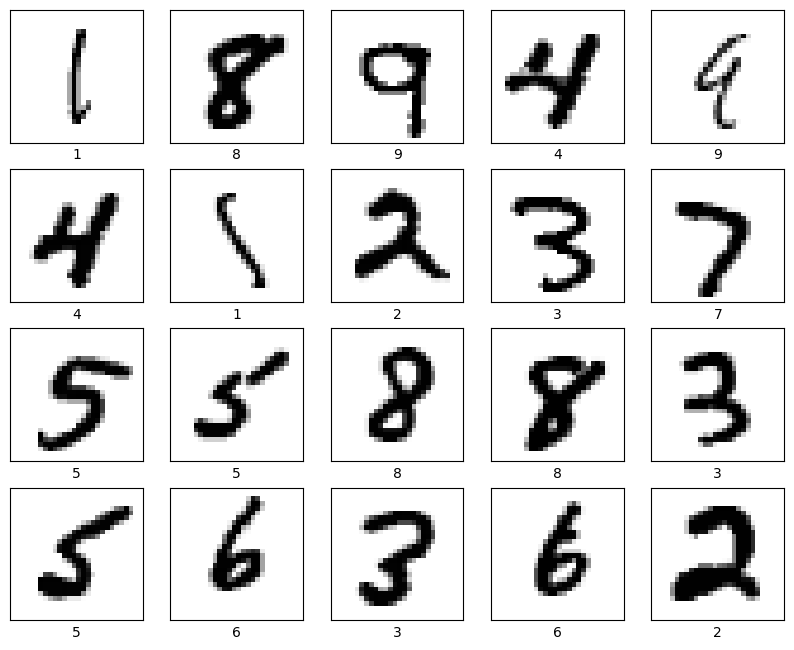

In [ ]:
image_number = random.randint(0, len(X_train) - 20)
plt.figure(figsize=(10,10))
for i in range(image_number, image_number + 20):
  plt.subplot(5,5,i-image_number + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

### Подготовка данных

Перевод данных из матричного в векторное представление

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Нормализация данных

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Преобразование меток в категории

In [ ]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

### Модель полносвязной нейронной сети

Создаем последовательную модель

In [ ]:
model = Sequential()

Добавим уровни сети

В качестве модели предлагается использовать модель с двумя полносвязными слоями.
Первому слою должна передаваться форма входных данных, используйте функцию
активации - relu. Функция активации выходного слоя должна возвращать вероятность
принадлежности экземпляра целевому классу.

In [ ]:
model.add(Dense(800, input_dim=784, activation="relu",
kernel_initializer="normal"))
model.add(Dense(10, activation="softmax",
kernel_initializer="normal"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Компиляция модели

Настройка процесса обучения. Задаем оптимизатор и функцию потерь, которые должны
использоваться моделью, а также метрику для мониторинга во время обучения

In [1]:
model.compile(loss="categorical_crossentropy", optimizer="SGD",
metrics=["accuracy"])

NameError: ignored

### Обучение модели

Выполним обучение модели на 25 эпохах, 20 процентов обучающей выборки будет
использовано для оценки модели, во время обучения, размер пакета 200. Можете изменить
количество эпох обучения на более высокое значение, однако это займет значительно
больше времени.

In [ ]:
history = model.fit(X_train,
Y_train,
batch_size=200,
epochs=25,
validation_split=0.2, verbose=2)

Epoch 1/25
240/240 - 5s - loss: 1.3354 - accuracy: 0.6887 - val_loss: 0.7916 - val_accuracy: 0.8455 - 5s/epoch - 21ms/step
Epoch 2/25
240/240 - 3s - loss: 0.6769 - accuracy: 0.8495 - val_loss: 0.5412 - val_accuracy: 0.8788 - 3s/epoch - 14ms/step
Epoch 3/25
240/240 - 3s - loss: 0.5237 - accuracy: 0.8729 - val_loss: 0.4511 - val_accuracy: 0.8894 - 3s/epoch - 13ms/step
Epoch 4/25
240/240 - 4s - loss: 0.4547 - accuracy: 0.8846 - val_loss: 0.4030 - val_accuracy: 0.8961 - 4s/epoch - 17ms/step
Epoch 5/25
240/240 - 3s - loss: 0.4138 - accuracy: 0.8916 - val_loss: 0.3727 - val_accuracy: 0.9023 - 3s/epoch - 14ms/step
Epoch 6/25
240/240 - 3s - loss: 0.3861 - accuracy: 0.8971 - val_loss: 0.3515 - val_accuracy: 0.9062 - 3s/epoch - 14ms/step
Epoch 7/25
240/240 - 3s - loss: 0.3655 - accuracy: 0.9012 - val_loss: 0.3358 - val_accuracy: 0.9097 - 3s/epoch - 13ms/step
Epoch 8/25
240/240 - 4s - loss: 0.3495 - accuracy: 0.9044 - val_loss: 0.3228 - val_accuracy: 0.9137 - 4s/epoch - 17ms/step
Epoch 9/25
240/2

Сохраним модели

In [ ]:
model.save('Model_MNIST_PNN.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Оценка модели

Построим предсказания и визуализируйте их. Построим график для визуализации
изменения оценки модели на разных эпохах. Когда наступает переобучение?

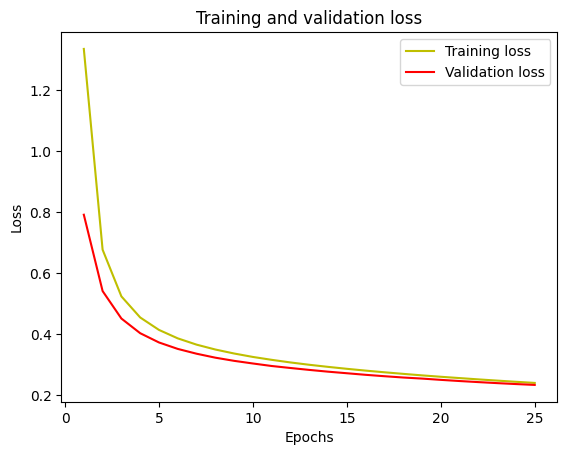

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Оценка качества обучения сети на тестовых данных

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test score: %f" % scores[0])
print("Test accuracy: %f" % scores[1])

Test score: 0.233526
Test accuracy: 0.934900


## Программа по вариантам

Для классификации был выбран датасет flowers, содержащий фотографии пяти классов цветов - 'tulips' (тюльпаны), 'daisy' (маргаритки), 'roses' (розы), 'dandelion' (одуванчики), 'sunflowers' (подсолнухи).

Набор данных из примерно 3700 фотографий цветов. Набор данных содержит пять подкаталогов, по одному на класс.

Ссылка на датасет:

https://www.kaggle.com/code/gurwindervirk/flower-classification-using-tensorflow

### Считывание и просмотр набора данных

In [ ]:
# скачиваем архив с данными

!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-10-21 03:54:47--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   197MB/s    in 1.1s    

2023-10-21 03:54:48 (197 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
# просматриваем содержимое директории, чтобы убедиться, что архив скачан

!ls

drive  flower_photos.tgz  sample_data


In [ ]:
# разархивировали датасет

!tar -xf /content/flower_photos.tgz

In [ ]:
# путь к датасету

dataset_path = '/content/flower_photos/'

In [ ]:
# получили названия классов, они же названия внутренних папок

class_labels = [dI for dI in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path,dI))]
class_labels

['tulips', 'daisy', 'roses', 'dandelion', 'sunflowers']

In [ ]:
# просматриваем изображения цветов из каждого каталога

for folder in class_labels:

  # составили путь до папки
  folder_path = dataset_path + folder + '/'

  # получили названия файлов
  flowers_path_filenames = os.listdir(folder_path)
  flowers_path_filenames = natsort.natsorted(flowers_path_filenames)

  #отобразили с 3 до 8 изображения (в пять столбцов)
  display_images(folder_path, flowers_path_filenames, 3, 8, 5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# получим количество изображений в каждом классе,
# чтобы проверить сбалансированность датасета

# ассоциативный массив: ключ - имя класса, значение - кол-во изображений
classes_nums = dict()

for folder in class_labels:

  # составили путь
  folder_path = dataset_path + folder + '/'
  # получили список файлов
  flowers_path_filenames = os.listdir(folder_path)

  #добавили новый элемент в массив
  classes_nums[folder] = len(flowers_path_filenames)


print(classes_nums )

{'tulips': 799, 'daisy': 633, 'dandelion': 898, 'roses': 641, 'sunflowers': 699}


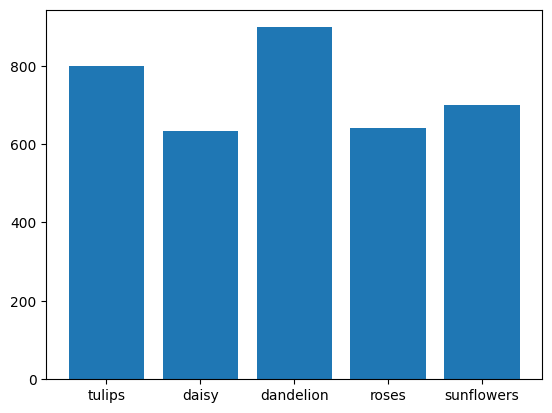

In [ ]:
# построим столбчатую диаграмму, чтобы оценить кол-во элементов в каждом классе

plt.bar(range(len(classes_nums)), list(classes_nums.values()), align='center')
plt.xticks(range(len(classes_nums)), list(classes_nums.keys()))

plt.show()

По диаграмме можно увидеть незначительную несбалансированность датасета.

### Подготовка данных

In [ ]:
# удаление каталогов
#os.path.isdir(splited_path)

#shutil.rmtree('flower_photos')
#shutil.rmtree(splited_path)

Разбиваем данные на тренировочную,валидационную и тестовую выборки в соотношении 0.8, 0.15 и 0.05.

In [ ]:
splited_path = "images_splited"
splitfolders.ratio(dataset_path, splited_path, ratio=(0.8, 0.15, 0.05), seed=18, group_prefix=None )

Создаем пути для каждой выборки.

In [ ]:
train_path = splited_path + "/train"
val_path = splited_path + "/val"
test_path = splited_path + "/test"

Нормализуем данные.

In [ ]:
# определим параметры нормализации данных
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

# сгенерируем нормализованные данные
train_data = train.flow_from_directory(train_path,
                          class_mode='binary', shuffle=True)
val_data = val.flow_from_directory(val_path,
                                  class_mode='binary', shuffle=True)

Found 2934 images belonging to 5 classes.
Found 547 images belonging to 5 classes.


In [ ]:
# определим параметры нормализации данных
test = ImageDataGenerator(rescale=1/255)

# сгенерируем нормализованные данные
test_data = test.flow_from_directory(test_path,
                          class_mode='binary')

Found 189 images belonging to 5 classes.


Создадим переменную, хранящую значение числа классов (разновидностей цветов всего 5).

In [ ]:
total_number_of_classes = len(class_labels)
total_number_of_classes

5

### Модель полносвязной нейронной сети

В качестве модели была использована модель с тремя полносвязными слоями и слоем Flatten, расположенным на модели первым. Flatten используется для конвертации входящих данных в меньшую размерность. В нашем случае трехмерный массив-изображение конвертируется в одномерный массив для более удобной обработки данных. Слой Flatten позволяет осуществить данное преобразование, объединяя элементы вложенных массивов в один единый массив.


Функциями активации внутренних слоёв являются relu. Функция активации выходного слоя должна возвращать вероятность принадлежности экземпляра целевому классу, в данной модели была использована softmax для многоклассовой классификации.

Инициализатор  kernel_initializer="normal" определяет способ установки начальных случайных весов слоев Keras.

In [ ]:
basic_model = Sequential()

basic_model.add(tf.keras.layers.Flatten()),
basic_model.add(tf.keras.layers.Dense(60,kernel_initializer="normal", activation='relu'))
basic_model.add(tf.keras.layers.Dense(30, kernel_initializer="normal", activation='relu'))
basic_model.add(tf.keras.layers.Dense(total_number_of_classes, kernel_initializer="normal", activation = 'softmax'))

#### Компиляция модели

Настройка процесса обучения модели.

В качестве оптимизатора был выбран adam как наиболее эффективный алгоритм оптимизации, сочетающий в себе идеи RMSProp и оптимизатора импульса. В качестве функции потерь выбрана sparse_categorical_crossentropy. Её отличие от categorical_cross entropy в том, что categorical_cross entropy создает одномерный массив, содержащий вероятное совпадение для каждой категории,
sparse_categorical_cross entropy создает индекс категории наиболее вероятной совпадающей категории.

In [ ]:
# Файл для сохранения модели с лучшими параметрами

basic_model_checkpoint_filepath = 'best_model_basic'

In [ ]:
#компилируем модель

basic_model.compile(
  optimizer = "adam",
  loss = "sparse_categorical_crossentropy",
  metrics = ["accuracy"]
)

Настраиваем функцию-callback, позволяющую отслеживать метрики в процессе обучения модели и сохранять модель с лучшими настройками.

In [ ]:
# callback для мониторинга метрик

basic_model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath = basic_model_checkpoint_filepath,
  monitor = 'val_accuracy',
  mode = 'max',
  save_best_only = True
)

#### Обучение модели

Обучение модели производилось на 20 эпохах с размером батча, равным 32.

In [ ]:
EPOCHS = 20

basic_model_history = basic_model.fit(
    train_data,
    batch_size = 32,
    verbose = 1,
    epochs = EPOCHS,
    validation_data = val_data,
    callbacks = [basic_model_checkpoint_callback]
  )

Epoch 1/20
92/92 [==============================] - 38s 398ms/step - loss: 1.6528 - accuracy: 0.3228 - val_loss: 1.4729 - val_accuracy: 0.4004
Epoch 2/20
92/92 [==============================] - 46s 502ms/step - loss: 1.3653 - accuracy: 0.4172 - val_loss: 1.2857 - val_accuracy: 0.4205
Epoch 3/20
92/92 [==============================] - 42s 450ms/step - loss: 1.2609 - accuracy: 0.4465 - val_loss: 1.2805 - val_accuracy: 0.4534
Epoch 4/20
92/92 [==============================] - 44s 474ms/step - loss: 1.2238 - accuracy: 0.4683 - val_loss: 1.2548 - val_accuracy: 0.4333
Epoch 5/20
92/92 [==============================] - 44s 481ms/step - loss: 1.2062 - accuracy: 0.4867 - val_loss: 1.2560 - val_accuracy: 0.4753
Epoch 6/20
92/92 [==============================] - 41s 436ms/step - loss: 1.1685 - accuracy: 0.5055 - val_loss: 1.2666 - val_accuracy: 0.4516
Epoch 7/20
92/92 [==============================] - 34s 369ms/step - loss: 1.0912 - accuracy: 0.5457 - val_loss: 1.2254 - val_accuracy: 0.4589

####Оценка модели

Визуализируем процесс обучения модели.

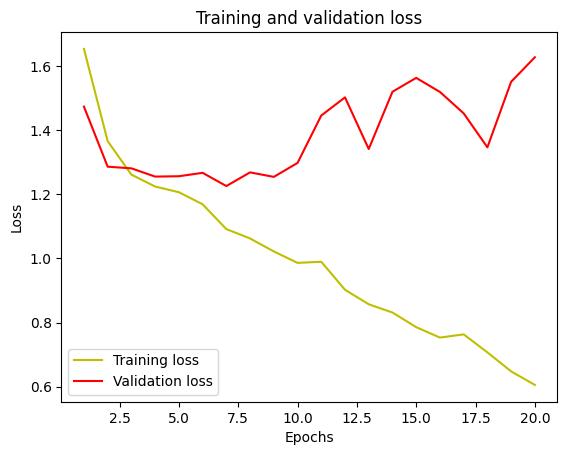

In [ ]:
history_visualization(basic_model_history)

Загрузим из файла модель, показавшую наилучшие рещультаты во время обучения.

In [ ]:
basic_model_loaded = keras.models.load_model(basic_model_checkpoint_filepath)

Оценим модель на тестовой выборке.

**Значение точности на тестовой выборке составило 0.45.**

In [ ]:
basic_model_loaded.evaluate(test_data)

6/6 [==============================] - 1s 159ms/step - loss: 1.6609 - accuracy: 0.4497


[1.6609457731246948, 0.44973546266555786]

### Сверточная модель 1

Слои:

*   Conv2D - реализация сверточного слоя в keras. Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам.
*   MaxPool2D - реализация операции max pooling. Следующий слой после сверточного должен укрупнять масштаб полученных признаков, для этого чаще всего используется операция MaxPooling (в каждом окне выбирается максимальное значение).

Чтобы предотвратить переобучение, были также добавлены слои Dropout. Цель этого метода – снизить специализацию каждого отдельного нейрона. На каждой итерации изменения весовых коэффициентов часть нейронов нужно исключать с заданной вероятностью p (параметр слоя Dropout).

В качестве функции активации внутренних слоев была выбрана selu. Расшифровка звучит как «масштабированная экспоненциальная линейная единица». Принцип работы этой функции активации заключается в том, что она обеспечивает внутреннюю нормализацию данных в слоях регулируя среднее значение и дисперсию.

В отличии от ReLU умеет работать с отрицательными значениями.

Нормализация данных происходит за счет предопределенных констант альфа α и лямбда λ, и таким образом сеть сходится быстрее.

Данная функция является относительно новой, но уже зарекомендовала себя в архитектурах CNN и RNN.

In [ ]:
conv_model_1 = Sequential([
    keras.layers.Conv2D(16, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.05),

    keras.layers.Conv2D(64, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(128, (2,2), activation='selu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(256, (2,2), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='selu'),
    keras.layers.Dense(total_number_of_classes, activation='softmax')
])

#### Компиляция модели

Настройка процесса обучения модели.

Параметры компиляции остались такими же, как в прошлой модели.

In [ ]:
# Файл для сохранения модели с лучшими параметрами

conv_model_1_checkpoint_filepath = 'best_conv_model_1'

In [ ]:
conv_model_1.compile(
  optimizer = "adam",
  loss = "sparse_categorical_crossentropy",
  metrics = ["accuracy"]
)

In [ ]:
conv_model_1_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath = conv_model_1_checkpoint_filepath,
  monitor = 'val_accuracy',
  mode = 'max',
  save_best_only = True
)

#### Обучение модели

Обучение производилось на 20 эпохах.

In [ ]:
EPOCHS = 20

conv_model_1_history = conv_model_1.fit(
    train_data,
    batch_size = 32,
    verbose = 1,
    epochs = EPOCHS,
    validation_data = val_data,
    callbacks = [conv_model_1_checkpoint_callback]
  )

Epoch 1/20
92/92 [==============================] - 261s 3s/step - loss: 2.9810 - accuracy: 0.4271 - val_loss: 1.3319 - val_accuracy: 0.5192
Epoch 2/20
92/92 [==============================] - 310s 3s/step - loss: 1.0922 - accuracy: 0.5661 - val_loss: 1.0064 - val_accuracy: 0.6307
Epoch 3/20
92/92 [==============================] - 266s 3s/step - loss: 1.0024 - accuracy: 0.6115 - val_loss: 1.1595 - val_accuracy: 0.6234
Epoch 4/20
92/92 [==============================] - 267s 3s/step - loss: 0.9571 - accuracy: 0.6333 - val_loss: 1.0923 - val_accuracy: 0.6325
Epoch 5/20
92/92 [==============================] - 264s 3s/step - loss: 0.8440 - accuracy: 0.6779 - val_loss: 1.1105 - val_accuracy: 0.6197
Epoch 6/20
92/92 [==============================] - 264s 3s/step - loss: 0.8111 - accuracy: 0.6878 - val_loss: 1.0178 - val_accuracy: 0.6490
Epoch 7/20
92/92 [==============================] - 262s 3s/step - loss: 0.6951 - accuracy: 0.7382 - val_loss: 1.0796 - val_accuracy: 0.6380
Epoch 8/20
92

####Оценка модели

Визуализируем процесс обучения модели.

По графику можно отметить, что переобучение также наступает очень быстро.

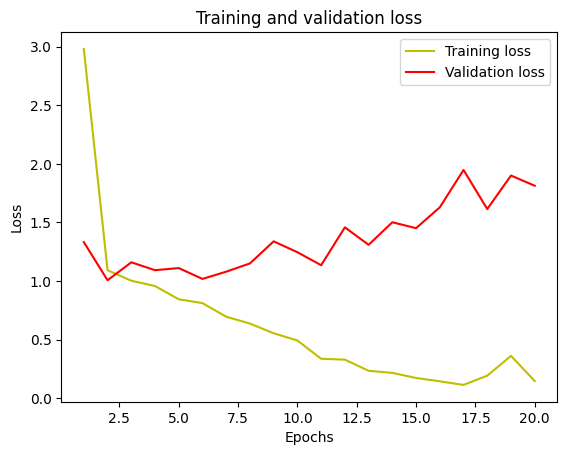

In [ ]:
history_visualization(conv_model_1_history)

Загрузим из файла модель, показавшую наилучшие рещультаты во время обучения.

In [ ]:
conv_model_1_loaded = keras.models.load_model(conv_model_1_checkpoint_filepath)

Оценим модель на тестовой выборке.

**Значение точности на тестовой выборке составило 0.61.**

In [ ]:
conv_model_1_loaded.evaluate(test_data)

6/6 [==============================] - 7s 1s/step - loss: 2.0555 - accuracy: 0.6190


[2.0554540157318115, 0.6190476417541504]

### Сверточная модель 2

Из графика обучения прошлой модели можно заключить, что слои Dropout с заданными параметрами не сработали при попытке предотвратить переобучение. Изменим параметры "прореживания" и добавим аугментацию.

Чем больше входных данных передается нейросети, тем лучше результат обучения. Для улучшения результата во время обучения сети будем генерировать новые данные за счет незначительных преобразований имеющихся фотографий - отражение по горизонтали, незначительные наклоны фото, изменение контраста и размера.

In [ ]:
# определяем параметры аугментации

data_augmentation = keras.Sequential(
  [
    # отражение по горизонтали
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(256, 256,3)),

    # вращение на рандомное значение до 0.05
    keras.layers.experimental.preprocessing.RandomRotation(0.05),

    # меняем контрастность изображений
    keras.layers.experimental.preprocessing.RandomContrast(0.23),

    # изменяем размер
    keras.layers.experimental.preprocessing.RandomZoom(0.2)

  ]
)

In [ ]:
conv_model_2 = Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.1), #увеличили вероятность

    keras.layers.Conv2D(64, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.1), #увеличили вероятность

    keras.layers.Conv2D(128, (2,2), activation='selu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(256, (2,2), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.5), #увеличили вероятность

    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='selu'),
    keras.layers.Dense(total_number_of_classes, activation='softmax')
])

#### Компиляция модели

In [ ]:
# Файл для сохранения модели с лучшими параметрами
conv_model_2_checkpoint_filepath = 'best_conv_model_2'

Оставим настройки прежними.

In [ ]:
conv_model_2.compile(
  optimizer = "adam",
  loss = "sparse_categorical_crossentropy",
  metrics = ["accuracy"]
)


In [ ]:
conv_model_2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath = conv_model_2_checkpoint_filepath,
  monitor = 'val_accuracy',
  mode = 'max',
  save_best_only = True
)

#### Обучение модели

Обучение модели производилось на 20 эпохах с размером батча 12 (прежний размер батча - 32 - дал результаты хуже).

In [ ]:
EPOCHS = 20

conv_model_2_history = conv_model_2.fit(
    train_data,
    batch_size = 12,
    verbose = 1,
    epochs = EPOCHS,
    validation_data = val_data,
    callbacks = [conv_model_2_checkpoint_callback]
  )

Epoch 1/20
92/92 [==============================] - 299s 3s/step - loss: 1.1975 - accuracy: 0.5314 - val_loss: 1.1224 - val_accuracy: 0.5686
Epoch 2/20
92/92 [==============================] - 303s 3s/step - loss: 1.1560 - accuracy: 0.5464 - val_loss: 1.1821 - val_accuracy: 0.5649
Epoch 3/20
92/92 [==============================] - 296s 3s/step - loss: 1.1070 - accuracy: 0.5617 - val_loss: 1.0471 - val_accuracy: 0.5905
Epoch 4/20
92/92 [==============================] - 308s 3s/step - loss: 1.0853 - accuracy: 0.5849 - val_loss: 1.0076 - val_accuracy: 0.6106
Epoch 5/20
92/92 [==============================] - 302s 3s/step - loss: 0.9919 - accuracy: 0.6285 - val_loss: 1.1542 - val_accuracy: 0.5777
Epoch 6/20
92/92 [==============================] - 296s 3s/step - loss: 1.0067 - accuracy: 0.6115 - val_loss: 0.8395 - val_accuracy: 0.6728
Epoch 7/20
92/92 [==============================] - 306s 3s/step - loss: 0.9579 - accuracy: 0.6322 - val_loss: 0.8209 - val_accuracy: 0.6782
Epoch 8/20
92

####Оценка модели

Визуализируем процесс обучения модели.

По графику можно отметить, что изменение настроек прореживания и добавление аугментации улучшило результаты.

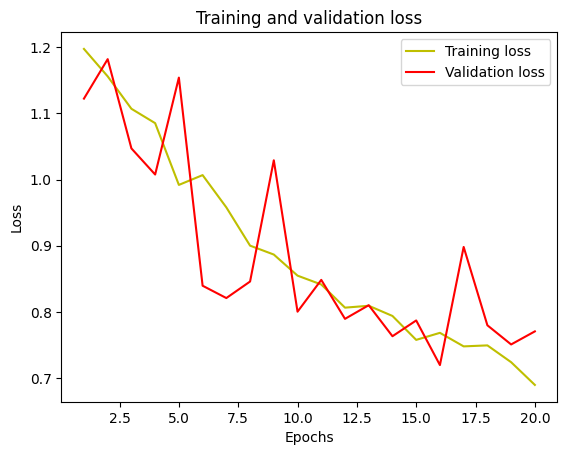

In [ ]:
history_visualization(conv_model_2_history)

Загрузим из файла модель, показавшую наилучшие рещультаты во время обучения.

In [ ]:
conv_model_2_loaded = keras.models.load_model(conv_model_2_checkpoint_filepath)

Оценим модель на тестовой выборке.

**Значение точности на тестовой выборке составило 0.67.**

In [ ]:
conv_model_2_loaded.evaluate(test_data)

6/6 [==============================] - 6s 907ms/step - loss: 0.8874 - accuracy: 0.6720


[0.8873721957206726, 0.6719576716423035]

### Сверточная модель 3

Оставим настройки слоёв прежними и поменяем оптимизатор на RMSprop.

In [ ]:
conv_model_3 = Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64, (3,3), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(128, (2,2), activation='selu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(256, (2,2), activation='selu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(total_number_of_classes, activation='softmax')
])

#### Компиляция модели

In [ ]:
# Файл для сохранения модели с лучшими параметрами
conv_model_3_checkpoint_filepath = 'best_conv_model_3'

Заменили Adam на RMSprop.

In [ ]:
conv_model_3.compile(
  optimizer = "RMSprop",
  loss = "sparse_categorical_crossentropy",
  metrics = ["accuracy"]
)

In [ ]:
conv_model_3_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath = conv_model_3_checkpoint_filepath,
  monitor = 'val_accuracy',
  mode = 'max',
  save_best_only = True
)

#### Обучение модели

Параметры обучения остались прежними.

In [ ]:
EPOCHS = 20

conv_model_3_history = conv_model_3.fit(
    train_data,
    batch_size = 12,
    verbose = 1,
    epochs = EPOCHS,
    validation_data = val_data,
    callbacks = [conv_model_3_checkpoint_callback]
  )

Epoch 1/20
92/92 [==============================] - 316s 3s/step - loss: 4.3147 - accuracy: 0.2791 - val_loss: 1.5798 - val_accuracy: 0.3473
Epoch 2/20
92/92 [==============================] - 296s 3s/step - loss: 1.6490 - accuracy: 0.3705 - val_loss: 1.9730 - val_accuracy: 0.4113
Epoch 3/20
92/92 [==============================] - 290s 3s/step - loss: 1.4771 - accuracy: 0.4237 - val_loss: 1.2095 - val_accuracy: 0.5302
Epoch 4/20
92/92 [==============================] - 295s 3s/step - loss: 1.2515 - accuracy: 0.4986 - val_loss: 1.2477 - val_accuracy: 0.4771
Epoch 5/20
92/92 [==============================] - 299s 3s/step - loss: 1.1683 - accuracy: 0.5365 - val_loss: 1.1871 - val_accuracy: 0.5320
Epoch 6/20
92/92 [==============================] - 292s 3s/step - loss: 1.0996 - accuracy: 0.5712 - val_loss: 1.8912 - val_accuracy: 0.5521
Epoch 7/20
92/92 [==============================] - 300s 3s/step - loss: 1.0658 - accuracy: 0.6002 - val_loss: 0.8546 - val_accuracy: 0.6709
Epoch 8/20
92

####Оценка модели

Визуализируем процесс обучения модели.

По графику можно отметить, что процесс обучения идет более сглаженно при использовании RMSprop.

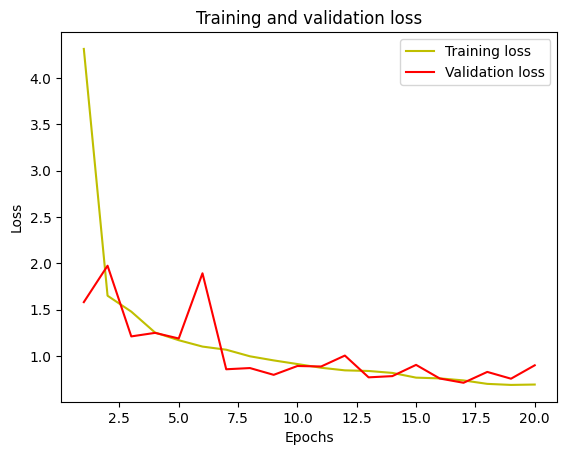

In [ ]:
history_visualization(conv_model_3_history)

Загрузим из файла модель, показавшую наилучшие рещультаты во время обучения.

In [ ]:
conv_model_3_loaded = keras.models.load_model(conv_model_3_checkpoint_filepath)

Оценим модель на тестовой выборке.

**Значение точности на тестовой выборке составило 0.66.**


In [ ]:
conv_model_3_loaded.evaluate(test_data)

6/6 [==============================] - 6s 875ms/step - loss: 0.8493 - accuracy: 0.6614


[0.8492709398269653, 0.6613756418228149]

### Сверточная модель 4

Создадим другую сверточную модель, в которой каждый сверточный слой будет отделен слоем Dropout.

In [ ]:
conv_model_4 = keras.Sequential()

conv_model_4.add(data_augmentation) #аугментация

conv_model_4.add(keras.layers.Conv2D(32, (1, 1), activation='relu'))
conv_model_4.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

conv_model_4.add(keras.layers.Dropout(0.1))

conv_model_4.add(keras.layers.Conv2D(64, (1, 1), activation='relu'))
conv_model_4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

conv_model_4.add(keras.layers.Dropout(0.3))

conv_model_4.add(keras.layers.Conv2D(128, (1, 1), activation='relu'))
conv_model_4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

conv_model_4.add(keras.layers.Dropout(0.5))

conv_model_4.add(keras.layers.Flatten())
conv_model_4.add(keras.layers.Dense(128, activation='relu'))
conv_model_4.add(keras.layers.Dense(total_number_of_classes, activation='softmax'))

#### Компиляция модели

In [ ]:
# Файл для сохранения модели с лучшими параметрами
conv_model_4_checkpoint_filepath = 'best_conv_model_4'

Оставим в качестве оптимизатора RMSprop.

In [ ]:
conv_model_4.compile(
  optimizer = "RMSprop",
  loss = "sparse_categorical_crossentropy",
  metrics = ["accuracy"]
)

Добавим ещё один callback - early-stopping, который остановит обучение нашей модели, если после заданного количества эпох (10) не произойдет улучшения.

In [ ]:
conv_model_4_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath = conv_model_4_checkpoint_filepath,
  monitor = 'val_accuracy',
  mode = 'max',
  save_best_only = True
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                           patience=10,
                           mode='max',
                           verbose=1
                           )

callbacks_list = [early_stop, conv_model_4_checkpoint_callback]

#### Обучение модели

Увеличим количество эпох до 25.

In [ ]:
EPOCHS = 25

conv_model_4_history = conv_model_4.fit(
    train_data,
    batch_size = 32,
    verbose = 1,
    epochs = EPOCHS,
    validation_data = val_data,
    callbacks = callbacks_list
  )

Epoch 1/25
92/92 [==============================] - 161s 2s/step - loss: 2.3136 - accuracy: 0.3224 - val_loss: 1.3512 - val_accuracy: 0.4534
Epoch 2/25
92/92 [==============================] - 158s 2s/step - loss: 1.2149 - accuracy: 0.4721 - val_loss: 1.2334 - val_accuracy: 0.5064
Epoch 3/25
92/92 [==============================] - 155s 2s/step - loss: 1.1288 - accuracy: 0.5344 - val_loss: 1.2331 - val_accuracy: 0.4534
Epoch 4/25
92/92 [==============================] - 156s 2s/step - loss: 1.0818 - accuracy: 0.5729 - val_loss: 1.1271 - val_accuracy: 0.5594
Epoch 5/25
92/92 [==============================] - 167s 2s/step - loss: 1.0272 - accuracy: 0.5954 - val_loss: 1.0439 - val_accuracy: 0.5722
Epoch 6/25
92/92 [==============================] - 158s 2s/step - loss: 0.9857 - accuracy: 0.6145 - val_loss: 1.0247 - val_accuracy: 0.5759
Epoch 7/25
92/92 [==============================] - 159s 2s/step - loss: 0.9758 - accuracy: 0.6142 - val_loss: 0.9942 - val_accuracy: 0.6143
Epoch 8/25
92

####Оценка модели

Визуализируем процесс обучения модели.

Между 10 и 15 эпохой можно отметить начало переобучения, но поскольку мы задали параметр в early-stopping 10, модель доучилась до конца.

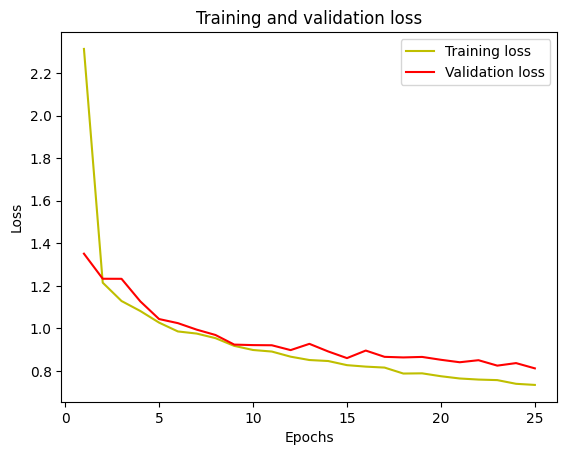

In [ ]:
history_visualization(conv_model_4_history)

Загрузим из файла модель, показавшую наилучшие рещультаты во время обучения.

In [ ]:
conv_model_4_loaded = keras.models.load_model(conv_model_4_checkpoint_filepath)

Оценим модель на тестовой выборке.

**Значение точности на тестовой выборке составило 0.65.**

In [ ]:
conv_model_4_loaded.evaluate(test_data)

6/6 [==============================] - 2s 275ms/step - loss: 0.9764 - accuracy: 0.6508


[0.9764443635940552, 0.6507936716079712]